In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

### Load data 

In [16]:
train = pd.read_csv('data/cs-training.csv')

In [17]:
test = pd.read_csv('data/cs-test.csv')

### Prepare data

In [18]:
y_train = train['SeriousDlqin2yrs']

In [19]:
X_train = train.drop(['SeriousDlqin2yrs'], axis = 1)

In [20]:
X_train['NumberOfDependents'] = X_train['NumberOfDependents'].fillna(0.0)
X_train['MonthlyIncome'] = X_train['MonthlyIncome'].fillna(0.0)

In [21]:
X_test = test.drop(['SeriousDlqin2yrs'], axis = 1)

In [22]:
X_test['NumberOfDependents'] = X_test['NumberOfDependents'].fillna(0.0)
X_test['MonthlyIncome'] = X_test['MonthlyIncome'].fillna(0.0)

### Split Train/Validation

In [23]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)

In [24]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [25]:
for train_index, test_index in sss.split(X_train, y_train):
    X_train_, X_val_ = X_train[train_index], X_train[test_index]
    y_train_, y_val_ = y_train[train_index], y_train[test_index]

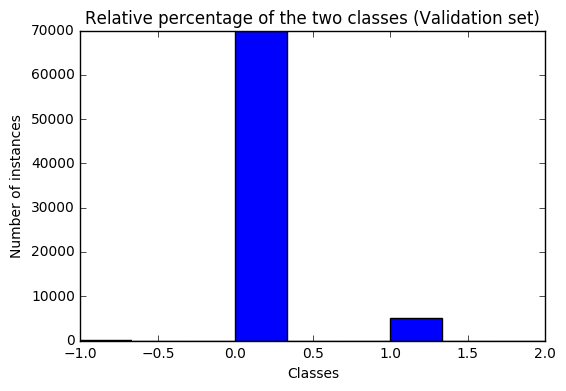

In [28]:
plt.title('Relative percentage of the two classes (Validation set)')
plt.ylabel('Number of instances')
plt.xlabel('Classes')
bins = np.linspace(-1, 2, 10)
plt.hist(y_val_, bins)
plt.show()

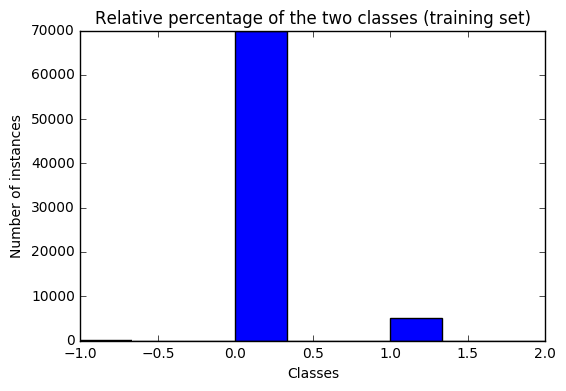

In [30]:
plt.title('Relative percentage of the two classes (training set)')
plt.ylabel('Number of instances')
plt.xlabel('Classes')
bins = np.linspace(-1, 2, 10)
plt.hist(y_train_, bins)
plt.show()

### Learning

In [ ]:
names = [ "LogisticRegression", "RandomForestClassifier" , "GradientBoostingClassifier",
"ExtraTreesClassifier",  "Neural Net", "AdaBoost",  " GaussianNB" ,"SVC", "QDA"]

classifiers = [
     LogisticRegression (),
     RandomForestClassifier(),
     GradientBoostingClassifier(),
     ExtraTreesClassifier(),
     MLPClassifier(),
     AdaBoostClassifier(),
     GaussianNB(),
     QuadraticDiscriminantAnalysis(),
     SVC(probability = True)]

w = []
for name, clf in zip(names, classifiers):
    print "start ", name
    clf.fit(X_train_, y_train_)
    print roc_auc_score(y_test_ , clf.predict(X_test_)) 

start  LogisticRegression
0.503076838832
start  RandomForestClassifier
0.571841143927
start  GradientBoostingClassifier
0.586163437021
start  ExtraTreesClassifier
0.573386429626
start  Neural Net
0.502941655139
start  AdaBoost
0.597337368211
start   GaussianNB
0.50653148571
start  SVC
0.661891837876
start  QDA


### Save data 

In [34]:
np.savetxt('./data/startingkit/X_train.txt' , X_train_)

In [35]:
np.savetxt('./data/startingkit/X_val.txt' , X_val_)